In [1]:
# Data preprocessing
import pandas as pd
import numpy as np

# Statistical methods
import statsmodels.api as sm

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Pipeline
from sklearn.pipeline import Pipeline

# Compose
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Logistic regression
from sklearn.linear_model import LogisticRegression

# SimpleImputer
from sklearn.impute import SimpleImputer

# kBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

# Model Selection
from sklearn.model_selection import train_test_split

# Accuracy Score
from sklearn.metrics import accuracy_score

## 1. Exploratory Data Analysis

- Check for trends in the Agriculture dataset. Find insights that are helpful to creating a predictive model for predicting the favourable plant to grow in a given set of conditions
- Find any unusual trends in the data that may result into errors when predicting.

In [2]:
agric_df = pd.read_excel("Agriculture data.xlsx", engine="openpyxl")

In [3]:
agric_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
agric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
agric_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
agric_df["label"].unique().tolist()

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [7]:
agric_df.rename(columns={"label": "Crop"}, inplace=True)

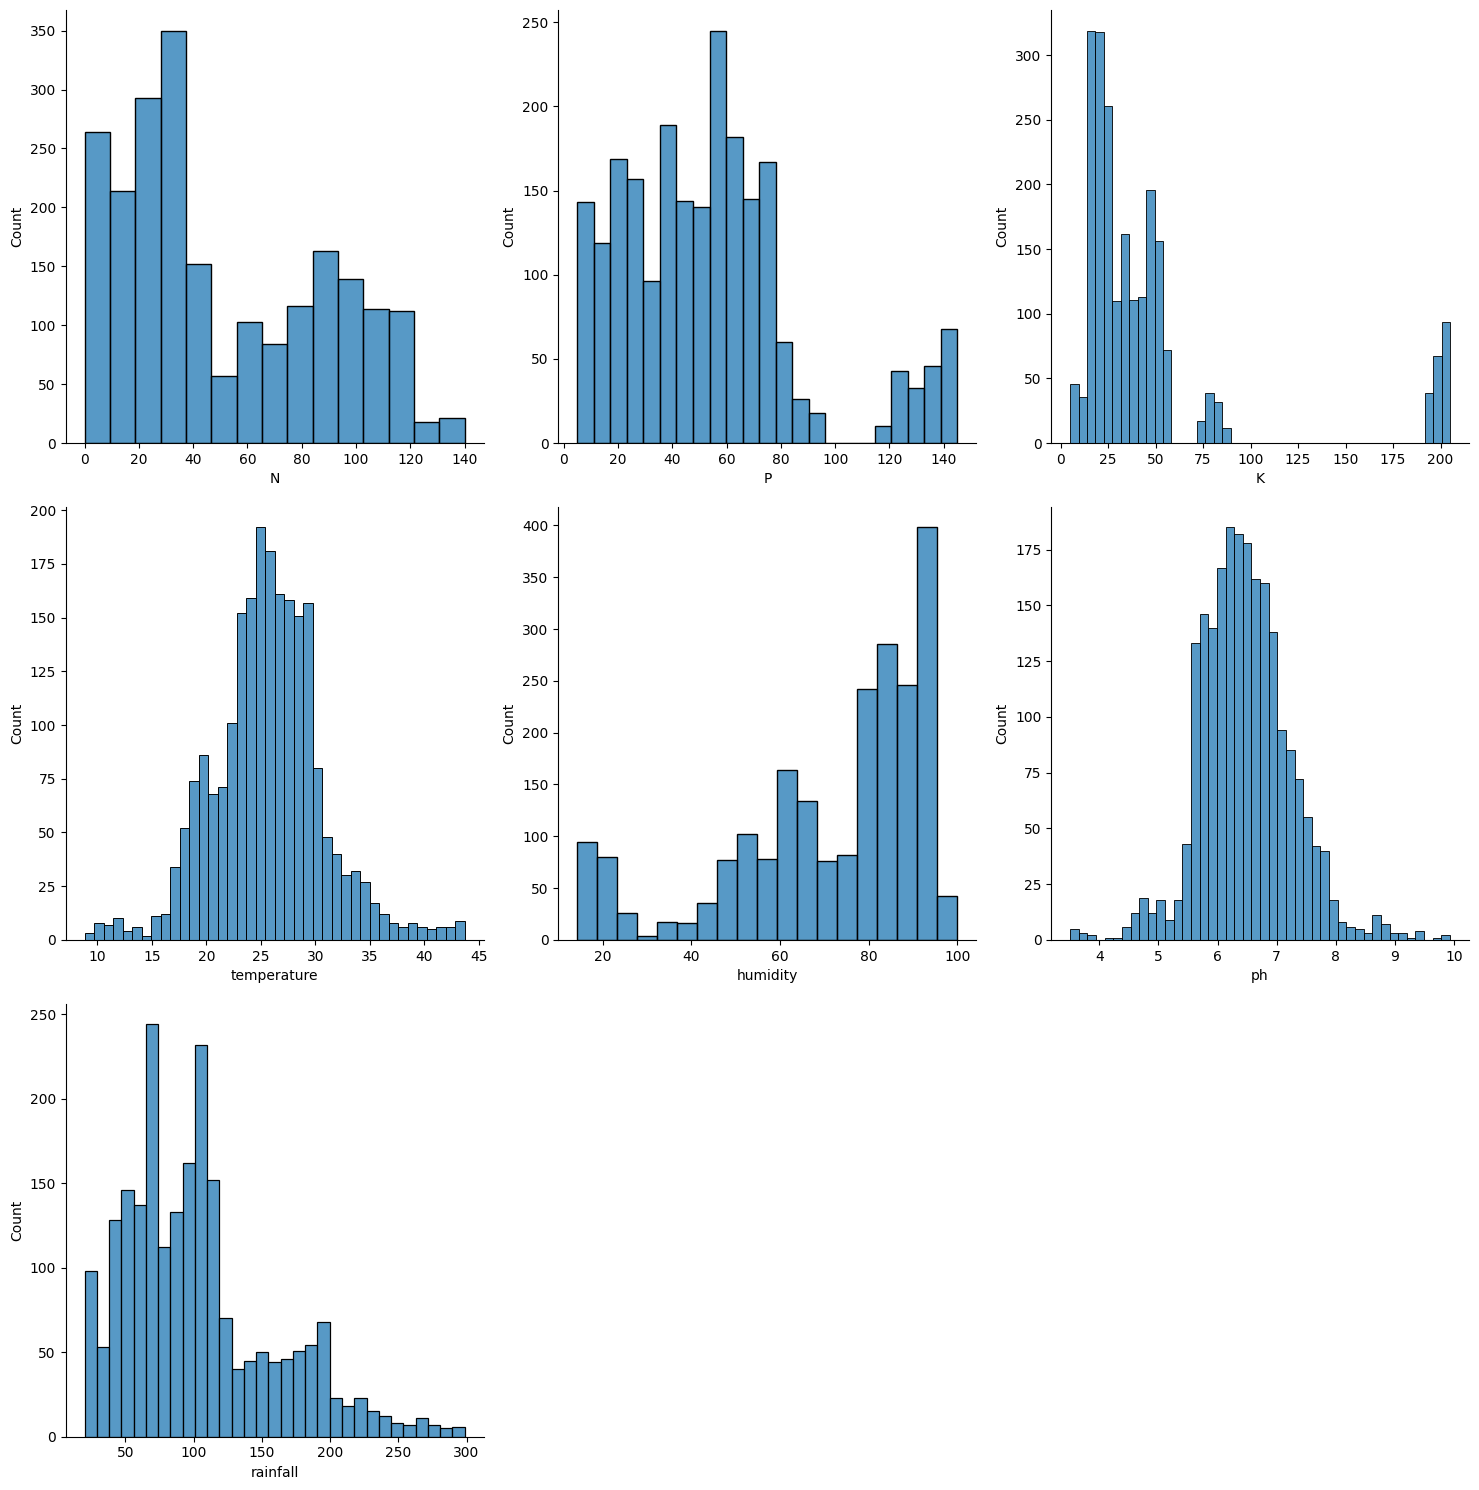

In [8]:
numerical_columns = agric_df.select_dtypes(include=np.number).columns.tolist()
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=agric_df, x=col, ax=axes[i])
    sns.despine()
    plt.tight_layout()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [9]:
agric_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

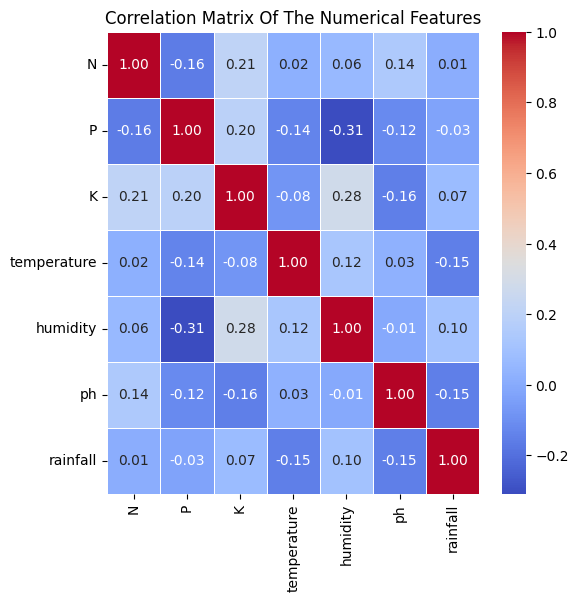

In [10]:
num_cols = agric_df.select_dtypes(include=np.number)
# Plotting a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(num_cols.corr('spearman'), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Of The Numerical Features")
plt.show()

In [11]:
agric_df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
Crop             22
dtype: int64

In [12]:
print(f"Shape: {agric_df.shape}")

Shape: (2200, 8)


In [13]:
print(agric_df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop'], dtype='object')


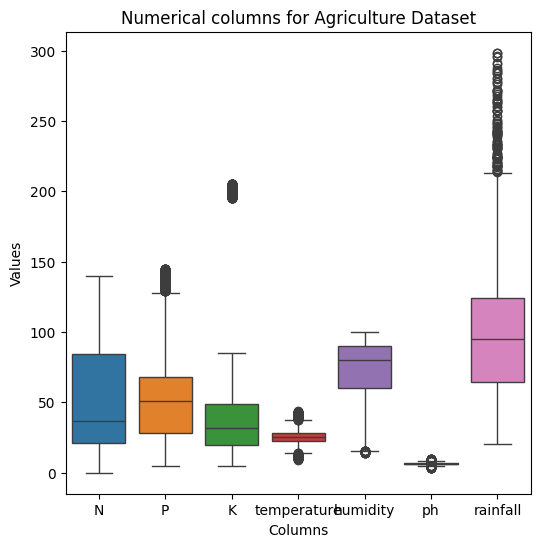

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(num_cols)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Agriculture Dataset")
plt.show()

In [15]:
display(agric_df)

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## 2. Feature Enineering

In [16]:
def quartiles(col_data):
    '''
        quartile - removes the outliers that are present above the third quartile and below the
                    first quartile.
        Args:
            1. col_data: The columns data.
        Return:
            Returns the new column data after the outliers have been filtered out.
    '''

    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1

    upper_qt = Q3 + 1.5 * IQR
    lower_qt = Q1 - 1.5 * IQR

    # Filter data to exclude outliers
    no_outliers = col_data[(col_data >= lower_qt) & (col_data <= upper_qt)]
    
    return no_outliers

In [17]:
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(column)

In [18]:
agric_df_clean = pd.DataFrame()

# Loop through all columns in agric_df
for column in agric_df.columns:
    if is_numeric(agric_df[column]):
        # Numeric columns: Compute quartiles and add to new_df
        agric_df_clean[column] = agric_df[column]
        continue
    else:
        # Categorical columns: Directly copy to new_df
        agric_df_clean[column] = agric_df[column]

# Now new_df contains both numeric and categorical columns
print(agric_df_clean.tail())

        N   P   K  temperature   humidity        ph    rainfall    Crop
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [19]:
agric_df_clean.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [20]:
print(f"Shape: {agric_df_clean.shape}")

Shape: (2200, 8)


In [21]:
agric_df_clean = agric_df_clean.drop_duplicates()

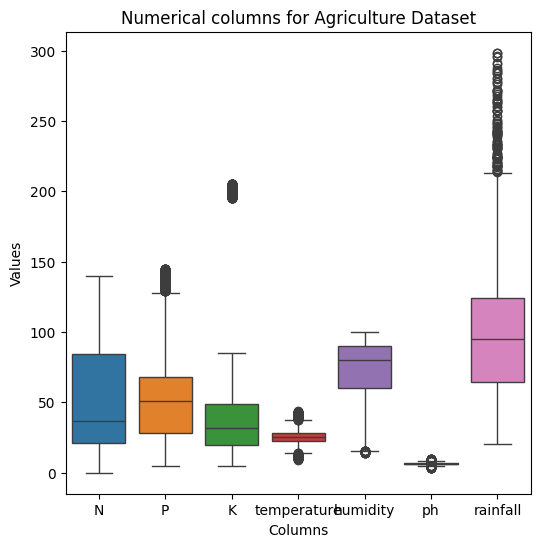

In [22]:
plt.figure(figsize=(6, 6))
sns.boxplot(agric_df_clean)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Agriculture Dataset")
plt.show()

In [23]:
agric_df_clean['K'].describe()

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64

In [24]:
agric_df_clean.loc[agric_df_clean.isnull().any(axis=1)]

,N,P,K,temperature,humidity,ph,rainfall,Crop


## 3. Model Creation

- Create a model pipeline
- Scale the data using MinMaxScaler
- Transform Columns
- Encode categorical columns
- Bring the Pipeline object together

In [25]:
# Splitting the dataset into x and y columns.
x = agric_df_clean.drop(columns=['Crop'])
y = agric_df_clean['Crop']

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create transformers
# Numeric Transformer: Imputes missing values using the median of each column and scales values to a range between 0 and 1
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Combine all transformers into a preprocessor using ColumnTransformer
# This allows different columns of the input data to be transformed using different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough'  # Include any remaining columns as-is
)

# Encode the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [26]:
label_encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [27]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [28]:
x[:10]

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
5,69,37,42,23.058049,83.370118,7.073454,251.055000
6,69,55,38,22.708838,82.639414,5.700806,271.324860
7,94,53,40,20.277744,82.894086,5.718627,241.974195
8,89,54,38,24.515881,83.535216,6.685346,230.446236
9,68,58,38,23.223974,83.033227,6.336254,221.209196


In [30]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Print train and test set shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Generate predictions
y_pred = pipeline.predict(X_test)

# Test accuracy on X_test
print("Accuracy:", accuracy_score(y_test, y_pred))

X_train: (1760, 7)
X_test: (440, 7)
y_train: (1760,)
y_test: (440,)
Accuracy: 0.9181818181818182


## 4. Model Evaluation and Optimization

- Check for accuracy on train data and on test data
- Get classfification matrix for all the 22 classes.
- Optimize model for better finetuned performance.

In [31]:
y_pred_train = pipeline.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
y_pred_test = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9477272727272728
Test Accuracy: 0.9181818181818182


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.89      0.85      0.87        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.84      0.70      0.76        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.95      0.98        21
          12       0.66      1.00      0.79        19
          13       1.00      0.54      0.70        24
          14       0.86      1.00      0.93        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

## 5. Model Cross Validation and Selection of best performing model

- create parameters for which model is to be cross validated with: `param_grid`.
- `grid_search` parameters to get the best performance for training the model.
- Save the model ready for deployment and use.

In [41]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__max_iter': [100, 200, 300, 500, 1000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best Cross Validation Score:", grid_search.best_score_)

# Save the best performing model
best_model = grid_search.best_estimator_

Best parameters: {'classifier__C': 10.0, 'classifier__max_iter': 100}
Best Cross Validation Score: 0.9693181818181819


In [43]:
import pickle
import os

# Save the model to disk
MODEL_PATH = os.path.join("model", "agriculture_model.pkl")
with open(MODEL_PATH, "wb") as model_file:
    pickle.dump(best_model, model_file)